# CAPM - Capital Asset Pricing Model 

Watch the video for the full overview.

Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM of a portfolio


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [1]:
# Model CAPM as a simple linear regression

In [1]:
from scipy import stats
import quandl

In [2]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero.
    stderr : float
        Standard error of the estimated gradient.
    
    See also
    --------
    :func:`scipy.optimize.curve_fit` : Use 

In [3]:
import pandas as pd


In [4]:
import pandas_datareader as web

In [5]:
spy_etf = web.DataReader('SPY','yahoo')


In [6]:
spy_etf.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-30,282.600006,284.739990,281.220001,281.760010,281.760010,131796400
2018-01-31,282.730011,283.299988,280.679993,281.899994,281.899994,108364800
2018-02-01,281.070007,283.059998,280.679993,281.579987,281.579987,90102500
2018-02-02,280.079987,280.230011,275.410004,275.450012,275.450012,167378100
2018-02-05,273.450012,275.850006,263.309998,264.109985,264.109985,294683194


In [13]:
spy_etf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,96.341141,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,96.596169,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,96.664169,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,97.072220,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,97.395248,126402800


In [28]:
start = spy_etf.index.min()
end = spy_etf.index.max()
print(start)
print(end)

2010-01-04 00:00:00
2018-02-05 00:00:00


In [116]:
#aapl = web.DataReader('AAPL','yahoo',start,end)
quandl.ApiConfig.api_key = "xFrys3gbA4d6xL_4BMM9"
aapl = quandl.get('WIKI/AAPL',startdate=start,enddate=end)

In [117]:
#spy_etf.index.min()
aaplr = aapl[start:end].copy(deep=True)

In [119]:
comb = spy_etf.join(aaplr,how='left',rsuffix='_aapl')
comb.reset_index(inplace=True)

In [120]:
aapl = pd.concat([comb['Date'],comb['Adj. Close']],axis=1)
spy = pd.concat([comb['Date'],comb['Adj Close']],axis=1)

In [124]:
spy.columns = ['Date','Close']
aapl.columns = ['Date','Close']

In [128]:
spy.set_index(keys='Date',inplace=True)
aapl.set_index(keys='Date',inplace=True)

In [129]:
nullvals = spy[spy.join(aapl,how='left',rsuffix='_aapl')['Close_aapl'].isnull()]
nullvals

,Close
Date,
2017-08-07,245.391647
2017-11-08,257.792297


In [137]:
for v in nullvals.index:
    spy.drop(v,inplace=True)

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline

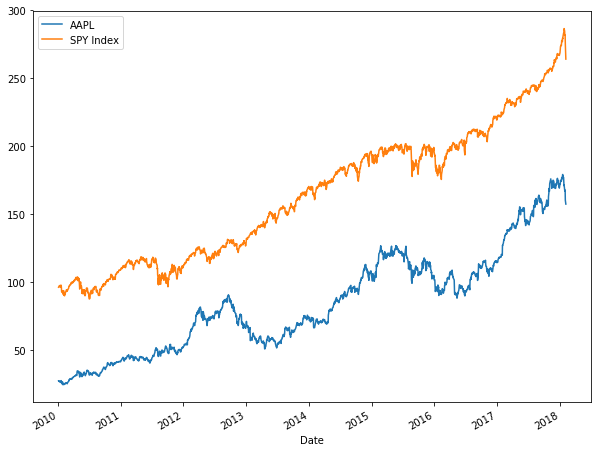

In [144]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy['Close'].plot(label='SPY Index')
plt.legend()

## Compare Cumulative Return

In [145]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy['Cumulative'] = spy['Close']/spy['Close'].iloc[0]

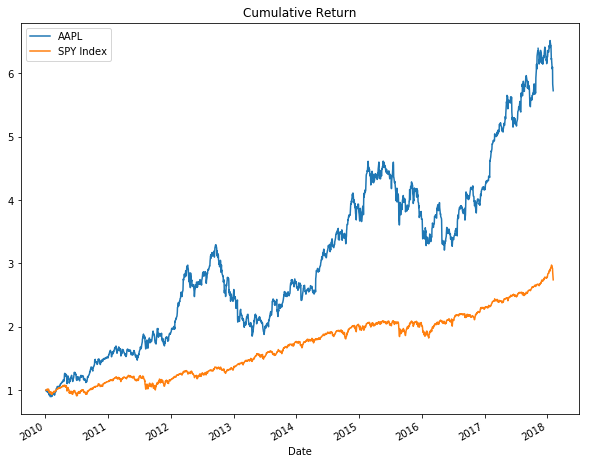

In [146]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Get Daily Return

In [147]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy['Daily Return'] = spy['Close'].pct_change(1)

In [155]:
aapl.dropna(inplace=True)
spy.dropna(inplace=True)

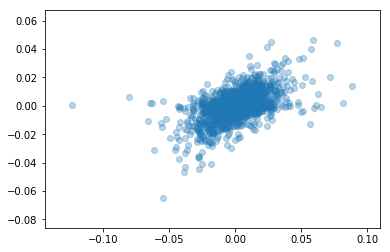

In [157]:
plt.scatter(aapl['Daily Return'],spy['Daily Return'],alpha=0.3)

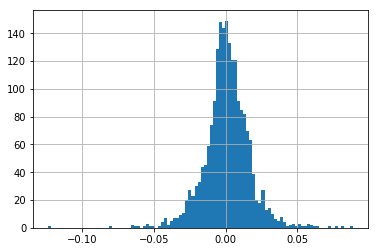

In [159]:
aapl['Daily Return'].hist(bins=100);

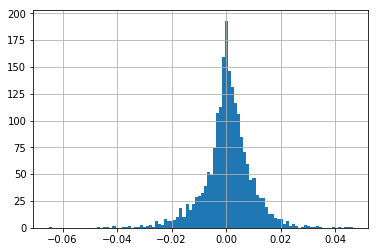

In [160]:
spy['Daily Return'].hist(bins=100);

In [161]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy['Daily Return'].iloc[1:])

In [162]:
beta

0.32186927085505468

In [163]:
alpha

0.00022076684133399575

In [164]:
r_value

0.55418086691358159

## What if our stock was completely related to SP500?

In [166]:
spy['Daily Return'].head()

Date
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
2010-01-11    0.001397
Name: Daily Return, dtype: float64

In [167]:
import numpy as np

In [179]:
noise = np.random.normal(0,0.001,len(spy['Daily Return'].iloc[1:]))

In [176]:
noise

array([ 0.01130637, -0.01090997, -0.00409664, ..., -0.01359088,
        0.00047602, -0.01252074])

In [171]:
spy['Daily Return'].iloc[1:] + noise

Date
2010-01-06    0.000362
2010-01-07    0.003598
2010-01-08    0.005394
2010-01-11    0.001778
2010-01-12   -0.008101
2010-01-13    0.007864
2010-01-14    0.002008
2010-01-15   -0.010550
2010-01-19    0.013363
2010-01-20   -0.010035
2010-01-21   -0.018105
2010-01-22   -0.023408
2010-01-25    0.005326
2010-01-26   -0.002175
2010-01-27    0.004362
2010-01-28   -0.010233
2010-01-29   -0.011616
2010-02-01    0.015412
2010-02-02    0.012302
2010-02-03   -0.005635
2010-02-04   -0.029642
2010-02-05    0.002632
2010-02-08   -0.008715
2010-02-09    0.013651
2010-02-10    0.000043
2010-02-11    0.010562
2010-02-12   -0.000966
2010-02-16    0.014981
2010-02-17    0.004485
2010-02-18    0.005788
                ...   
2017-12-21    0.002501
2017-12-22   -0.000064
2017-12-26   -0.000203
2017-12-27    0.000205
2017-12-28    0.001300
2017-12-29   -0.004617
2018-01-02    0.007348
2018-01-03    0.006006
2018-01-04    0.005036
2018-01-05    0.006273
2018-01-08    0.002496
2018-01-09    0.000511
2018-0

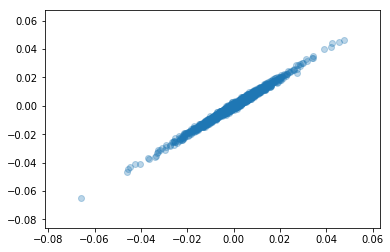

In [188]:
plt.scatter(spy['Daily Return'].iloc[1:]+noise,spy['Daily Return'].iloc[1:],alpha=0.3);

In [180]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy['Daily Return'].iloc[1:]+noise,spy['Daily Return'].iloc[1:])

In [181]:
beta

0.98968125032172638

In [182]:
alpha

-1.0461138504951019e-06

Looks like our understanding is correct!